In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import typing as tp
import os

sns.set_theme(rc={'figure.figsize': (8.25, 5.875), 'figure.dpi': 100, 'axes.labelpad': 2, 'savefig.pad_inches': .5})

2022-10-05 00:32:37.226560: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 00:32:37.322360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-10-05 00:32:37.322375: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-05 00:32:37.343100: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10

In [2]:
df_correct: pd.DataFrame = pd.read_pickle(os.path.join('..', 'data', 'SemesterProject', 'processed_data.pkl'))
df_incorrect: pd.DataFrame = pd.read_pickle(os.path.join('..', 'data', 'SemesterProject', 'processed_data_incorrect.pkl'))
df: pd.DataFrame = pd.concat([df_correct, df_incorrect], ignore_index=True).astype({'is_correct_movements': np.int8})  

df

,movement_id,subject_id,episode_num,positions,angles,positions_path,angles_path,skeleton,is_correct_movements,movement_name,filled_skeleton,reshaped_skeleton
0,4,6,3,"[[-3.02874, 75.90507, -270.5936, 0.0, 27.79706...","[[0.14469, 0.65008, -0.55925, 2.28859, 1.14512...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-3.02874, -3.0521766666666665, -3.233198000...",1,side_lunge,"[[[-3.02874, -3.02874, -3.0521766666666665, -3...","[[[-3.02874, -3.02874, -3.0521766666666665], [..."
1,5,7,8,"[[-1.38662, 84.46687, -232.60986, 0.0, 28.7417...","[[1.29924, -0.9601, -1.45577, 1.84614, 0.07701...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-1.38662, -1.3767133333333332, -1.343484, -...",1,sit_to_stand,"[[[-1.38662, -1.3767133333333332, -1.343484, -...","[[[-1.38662, -1.3767133333333332, -1.343484], ..."
2,3,1,7,"[[-12.26233, 81.59789, -248.86124, -2e-05, 27....","[[4.66077, 56.68494, 0.06777, 1.09106, 3.04529...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-12.26233, -12.32828, -12.324802, -12.30633...",1,inline_lunge,"[[[-12.26233, -12.26233, -12.32828, -12.32828,...","[[[-12.26233, -12.26233, -12.32828], [-12.3282..."
3,3,2,8,"[[-32.37641, 83.38937, -259.35818, 0.0, 30.475...","[[6.7506, 30.05265, -0.95628, 1.56654, 5.7209,...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-32.37641, -32.4872, -32.529323999999995, -...",1,inline_lunge,"[[[-32.37641, -32.37641, -32.4872, -32.4872, -...","[[[-32.37641, -32.37641, -32.4872], [-32.4872,..."
4,1,2,4,"[[-5.75375, 91.87819, -256.75516, 0.0, 31.3124...","[[18.99975, 1.46816, -1.66474, 2.46127, -1.360...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-5.75375, -5.718733333333334, -5.70244, -5....",1,deep_squat,"[[[-5.75375, -5.75375, -5.718733333333334, -5....","[[[-5.75375, -5.75375, -5.718733333333334], [-..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,6,3,"[[-2.63476, 83.50163, -240.37843, 0.0, 28.2200...","[[15.84974, -4.20364, -1.17937, 0.35739, 0.051...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-2.63476, -2.624546666666667, -2.6119, -2.5...",0,sit_to_stand,"[[[-2.63476, -2.624546666666667, -2.6119, -2.5...","[[[-2.63476, -2.624546666666667, -2.6119], [-2..."
1996,9,2,4,"[[-5.71642, 91.27028, -254.8842, 0.0, 31.52043...","[[-0.56814, -1.42729, 1.82979, 1.79609, -2.207...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-5.71642, -5.722166666666666, -5.7173, -5.7...",0,standing_shoulder_internal-external_rotation,"[[[-5.71642, -5.71642, -5.722166666666666, -5....","[[[-5.71642, -5.71642, -5.722166666666666], [-..."
1997,5,2,9,"[[-9.46943, 90.67174, -237.1367, 0.0, 31.4319,...","[[8.66695, -2.79748, -0.58766, 2.4597, -2.9478...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-9.46943, -9.475143333333333, -9.471862, -9...",0,sit_to_stand,"[[[-9.46943, -9.46943, -9.475143333333333, -9....","[[[-9.46943, -9.46943, -9.475143333333333], [-..."
1998,10,3,5,"[[-7.09957, 80.66993, -223.96956, 0.0, 31.1741...","[[1.71686, -2.48381, 0.568, 1.88909, 0.89951, ...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-7.09957, -7.143396666666667, -7.1779740000...",0,standing_shoulder_scaption,"[[[-7.09957, -7.09957, -7.143396666666667, -7....","[[[-7.09957, -7.09957, -7.143396666666667], [-..."


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X: np.ndarray = np.stack(df['reshaped_skeleton'].values)
y: np.ndarray = df['is_correct_movements'].values   

X.shape, y.shape

((2000, 180, 22, 3), (2000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, shuffle=True, train_size=.75)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 180, 22, 3), (500, 180, 22, 3), (1500,), (500,))

In [6]:
batch_size: int = 64
n_time_frames: int = X.shape[1]

In [7]:
tf.keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization(axis=None)
norm_layer.adapt(X_train)

normed_data = norm_layer(X_train)
print(f'Mean {normed_data.numpy().mean()} / Std {normed_data.numpy().std()}')


model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_time_frames, 22, 3)),
    norm_layer,
#     tf.keras.layers.Reshape((n_time_frames, -1)),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.LSTM(units=32, return_sequences=False, activation='elu'),
#     tf.keras.layers.LSTM(units=16, return_sequences=False),
#     tf.keras.layers.LSTM(units=32, return_sequences=False),
#     tf.keras.layers.LSTM(units=32, return_sequences=True),
#     tf.keras.layers.LSTM(units=16),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(units=512, activation='elu'),
    tf.keras.layers.Dense(units=64, activation='elu'),
#     tf.keras.layers.Dense(units=8, activation='tanh'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.summary()

2022-10-05 00:32:44.545188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 00:32:44.545502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-10-05 00:32:44.545549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-10-05 00:32:44.545589: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file

Mean -3.2048593112676826e-08 / Std 0.9999998807907104
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 180, 22, 3)       3         
 n)                                                              
                                                                 
 flatten (Flatten)           (None, 11880)             0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 11880)             0         
                                                                 
 dense (Dense)               (None, 512)               6083072   
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
  

In [8]:
n_epochs: int = 100

best_model_checkpoint_path: str = os.path.join('..', 'models', 'pt-exercise_right-wrong_best.mdl')
    
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_checkpoint_path, save_best_only=True, save_weights_only=True, initial_value_threshold=.6, verbose=0, monitor='val_accuracy')

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) # 'binary_crossentropy'

model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_test, y_test), callbacks=[checkpoint_callback])

Epoch 1/100
47/47 [==============================] - 1s 24ms/step - loss: 2.0417 - accuracy: 0.5373 - val_loss: 1.0243 - val_accuracy: 0.5360
Epoch 2/100
47/47 [==============================] - 1s 19ms/step - loss: 0.7411 - accuracy: 0.5833 - val_loss: 0.6652 - val_accuracy: 0.5820
Epoch 3/100
47/47 [==============================] - 1s 22ms/step - loss: 0.6163 - accuracy: 0.6520 - val_loss: 0.6614 - val_accuracy: 0.6020
Epoch 4/100
47/47 [==============================] - 1s 23ms/step - loss: 0.6017 - accuracy: 0.6693 - val_loss: 0.6124 - val_accuracy: 0.6380
Epoch 5/100
47/47 [==============================] - 1s 19ms/step - loss: 0.6447 - accuracy: 0.6700 - val_loss: 0.5915 - val_accuracy: 0.6360
Epoch 6/100
47/47 [==============================] - 1s 22ms/step - loss: 0.5701 - accuracy: 0.6760 - val_loss: 0.6421 - val_accuracy: 0.6420
Epoch 7/100
47/47 [==============================] - 1s 22ms/step - loss: 0.5150 - accuracy: 0.7360 - val_loss: 0.5521 - val_accuracy: 0.7100
Epoch 

47/47 [==============================] - 1s 17ms/step - loss: 0.2311 - accuracy: 0.9133 - val_loss: 0.7204 - val_accuracy: 0.8120
Epoch 59/100
47/47 [==============================] - 1s 17ms/step - loss: 0.1975 - accuracy: 0.9147 - val_loss: 0.6050 - val_accuracy: 0.8180
Epoch 60/100
47/47 [==============================] - 1s 17ms/step - loss: 0.1718 - accuracy: 0.9300 - val_loss: 0.6716 - val_accuracy: 0.8280
Epoch 61/100
47/47 [==============================] - 1s 16ms/step - loss: 0.1738 - accuracy: 0.9247 - val_loss: 0.6498 - val_accuracy: 0.8180
Epoch 62/100
47/47 [==============================] - 1s 21ms/step - loss: 0.1703 - accuracy: 0.9287 - val_loss: 0.6095 - val_accuracy: 0.8480
Epoch 63/100
47/47 [==============================] - 1s 17ms/step - loss: 0.1554 - accuracy: 0.9320 - val_loss: 0.7938 - val_accuracy: 0.8000
Epoch 64/100
47/47 [==============================] - 1s 17ms/step - loss: 0.1863 - accuracy: 0.9227 - val_loss: 0.6913 - val_accuracy: 0.8200
Epoch 65/100

In [9]:
history_df: pd.DataFrame = pd.DataFrame.from_dict(history.history)
history_df['epoch'] = history_df.index.values

total_num_epochs: int = history_df.shape[0]

history_df.describe()

,loss,accuracy,val_loss,val_accuracy,epoch
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.280538,0.875247,0.687360,0.783780,49.500000
std,0.225348,0.084403,0.124051,0.063228,29.011492
min,0.092405,0.537333,0.508722,0.536000,0.000000
25%,0.165278,0.855333,0.592112,0.760000,24.750000
50%,0.224826,0.903667,0.669829,0.802000,49.500000
75%,0.325863,0.929500,0.742203,0.826500,74.250000
max,2.041658,0.966667,1.088825,0.858000,99.000000


In [10]:
val_df: pd.DataFrame = history_df[['epoch', 'val_accuracy', 'val_loss']].copy().rename({'val_accuracy': 'accuracy', 'val_loss': 'loss'}, axis=1)
val_df['stage'] = 'validation'
train_df: pd.DataFrame = history_df[['epoch', 'accuracy', 'loss']].copy()
train_df['stage'] = 'training'

results_df: pd.DataFrame = pd.concat([val_df, train_df], ignore_index=True)
results_df.head()

,epoch,accuracy,loss,stage
0,0,0.536,1.024305,validation
1,1,0.582,0.665205,validation
2,2,0.602,0.661444,validation
3,3,0.638,0.612388,validation
4,4,0.636,0.591487,validation


<Figure size 825x587.5 with 0 Axes>

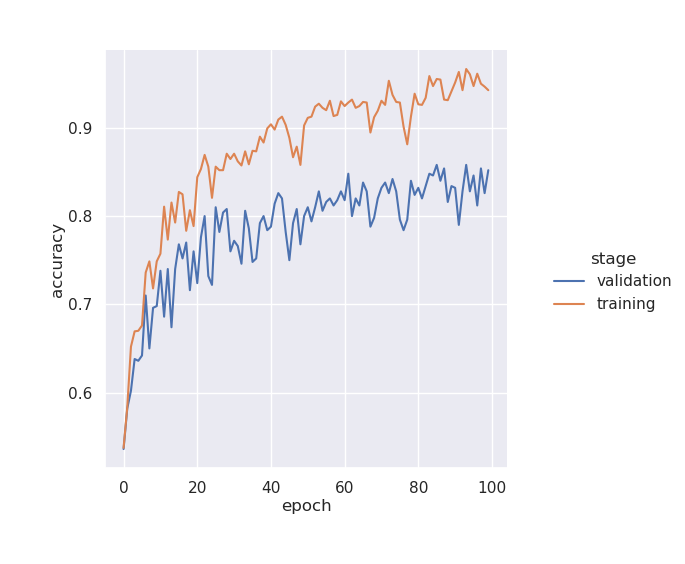

In [11]:
plt.clf()
ax = sns.relplot(data=results_df, x='epoch', y='accuracy', hue='stage', kind='line')
plt.show()

<Figure size 825x587.5 with 0 Axes>

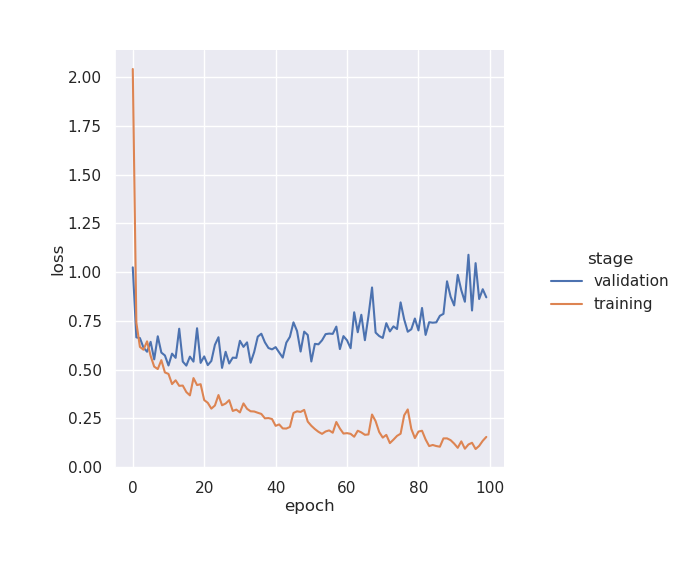

In [12]:
plt.clf()
ax = sns.relplot(data=results_df, x='epoch', y='loss', hue='stage', kind='line')
plt.show()